# Investigate No Show Medical Appointments Dataset.

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#cleaning">Data Cleaning</a></li>
<li><a href="#eda">Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
<li><a href="#resources">Resources</a></li>
</ul>

<a id='intro'></a>
## Introduction

The dataset under investigation is a collection of information from 100k medical appointments in Brazil and is focused on the question of whether or not patients show up for their appointment.

>**Questions:**
- What is the patient age distribution of no-shows versus shows?
- What is the patient health designation breakdown of no-shows versus shows?
- Which neighborhoods have the highest number of no-shows?
- What is the breakdown of no-shows versus shows by patients that received SMS reminders?
- Do no-shows have a larger timeframe between schedule date and appointment date?
- Do appointment no-shows occur on specific days of the week?
- Are there any trends in appointment no-shows versus shows over time?

<a id='wrangling'></a>
## Data Wrangling

In [76]:
import pandas as pd
import numpy as np
import datetime as dt
import matplotlib.pyplot as plt

%matplotlib inline

#### Loading Data

In [77]:
df = pd.read_csv("D:/noshowappointments.csv")

In [78]:
df.head()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


#### Info of Dataset

In [79]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   PatientId       110527 non-null  float64
 1   AppointmentID   110527 non-null  int64  
 2   Gender          110527 non-null  object 
 3   ScheduledDay    110527 non-null  object 
 4   AppointmentDay  110527 non-null  object 
 5   Age             110527 non-null  int64  
 6   Neighbourhood   110527 non-null  object 
 7   Scholarship     110527 non-null  int64  
 8   Hipertension    110527 non-null  int64  
 9   Diabetes        110527 non-null  int64  
 10  Alcoholism      110527 non-null  int64  
 11  Handcap         110527 non-null  int64  
 12  SMS_received    110527 non-null  int64  
 13  No-show         110527 non-null  object 
dtypes: float64(1), int64(8), object(5)
memory usage: 11.8+ MB


#### Checking for duplicate data.

In [80]:
print(sum(df.duplicated()))

0


#### Checking Dataset.

In [81]:
df.describe()

,PatientId,AppointmentID,Age,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received
count,1.105270e+05,1.105270e+05,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000
mean,1.474963e+14,5.675305e+06,37.088874,0.098266,0.197246,0.071865,0.030400,0.022248,0.321026
std,2.560949e+14,7.129575e+04,23.110205,0.297675,0.397921,0.258265,0.171686,0.161543,0.466873
min,3.921784e+04,5.030230e+06,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.172614e+12,5.640286e+06,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3.173184e+13,5.680573e+06,37.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,9.439172e+13,5.725524e+06,55.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,9.999816e+14,5.790484e+06,115.000000,1.000000,1.000000,1.000000,1.000000,4.000000,1.000000


<a id='cleaning'></a>
## Data Cleaning

#### Fixing column names.

In [82]:
new_labels = ['patientID', 'appointmentID', 'gender', 'schedule_day', 'appointment_day', 'age', 'neighborhood', 'scholarship', 'hypertension', 'diabetes', 'alcoholism', 'handicap', 'sms_received', 'no_show']
df.columns = new_labels
df.tail()

,patientID,appointmentID,gender,schedule_day,appointment_day,age,neighborhood,scholarship,hypertension,diabetes,alcoholism,handicap,sms_received,no_show
110522,2.572134e+12,5651768,F,2016-05-03T09:15:35Z,2016-06-07T00:00:00Z,56,MARIA ORTIZ,0,0,0,0,0,1,No
110523,3.596266e+12,5650093,F,2016-05-03T07:27:33Z,2016-06-07T00:00:00Z,51,MARIA ORTIZ,0,0,0,0,0,1,No
110524,1.557663e+13,5630692,F,2016-04-27T16:03:52Z,2016-06-07T00:00:00Z,21,MARIA ORTIZ,0,0,0,0,0,1,No
110525,9.213493e+13,5630323,F,2016-04-27T15:09:23Z,2016-06-07T00:00:00Z,38,MARIA ORTIZ,0,0,0,0,0,1,No
110526,3.775115e+14,5629448,F,2016-04-27T13:30:56Z,2016-06-07T00:00:00Z,54,MARIA ORTIZ,0,0,0,0,0,1,No


#### Changing schedule_day to datetime

In [83]:
df['schedule_day'] = pd.to_datetime(df['schedule_day'])
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
 #   Column           Non-Null Count   Dtype              
---  ------           --------------   -----              
 0   patientID        110527 non-null  float64            
 1   appointmentID    110527 non-null  int64              
 2   gender           110527 non-null  object             
 3   schedule_day     110527 non-null  datetime64[ns, UTC]
 4   appointment_day  110527 non-null  object             
 5   age              110527 non-null  int64              
 6   neighborhood     110527 non-null  object             
 7   scholarship      110527 non-null  int64              
 8   hypertension     110527 non-null  int64              
 9   diabetes         110527 non-null  int64              
 10  alcoholism       110527 non-null  int64              
 11  handicap         110527 non-null  int64              
 12  sms_received     110527 non-null  int64              
 13 

#### Stripping time from schedule_day since it has no time data

In [84]:
df['schedule_day'] = df['schedule_day'].apply(lambda x: x.strftime('%m-%d-%Y')) 
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   patientID        110527 non-null  float64
 1   appointmentID    110527 non-null  int64  
 2   gender           110527 non-null  object 
 3   schedule_day     110527 non-null  object 
 4   appointment_day  110527 non-null  object 
 5   age              110527 non-null  int64  
 6   neighborhood     110527 non-null  object 
 7   scholarship      110527 non-null  int64  
 8   hypertension     110527 non-null  int64  
 9   diabetes         110527 non-null  int64  
 10  alcoholism       110527 non-null  int64  
 11  handicap         110527 non-null  int64  
 12  sms_received     110527 non-null  int64  
 13  no_show          110527 non-null  object 
dtypes: float64(1), int64(8), object(5)
memory usage: 11.8+ MB


#### Changing appointment_day column to datetime

In [85]:
df['appointment_day'] = pd.to_datetime(df['appointment_day'])
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
 #   Column           Non-Null Count   Dtype              
---  ------           --------------   -----              
 0   patientID        110527 non-null  float64            
 1   appointmentID    110527 non-null  int64              
 2   gender           110527 non-null  object             
 3   schedule_day     110527 non-null  object             
 4   appointment_day  110527 non-null  datetime64[ns, UTC]
 5   age              110527 non-null  int64              
 6   neighborhood     110527 non-null  object             
 7   scholarship      110527 non-null  int64              
 8   hypertension     110527 non-null  int64              
 9   diabetes         110527 non-null  int64              
 10  alcoholism       110527 non-null  int64              
 11  handicap         110527 non-null  int64              
 12  sms_received     110527 non-null  int64              
 13 

#### Stripping time from appointment_day since schedule_day has no time data

In [86]:
df['appointment_day'] = df['appointment_day'].apply(lambda x: x.strftime('%m-%d-%Y'))
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   patientID        110527 non-null  float64
 1   appointmentID    110527 non-null  int64  
 2   gender           110527 non-null  object 
 3   schedule_day     110527 non-null  object 
 4   appointment_day  110527 non-null  object 
 5   age              110527 non-null  int64  
 6   neighborhood     110527 non-null  object 
 7   scholarship      110527 non-null  int64  
 8   hypertension     110527 non-null  int64  
 9   diabetes         110527 non-null  int64  
 10  alcoholism       110527 non-null  int64  
 11  handicap         110527 non-null  int64  
 12  sms_received     110527 non-null  int64  
 13  no_show          110527 non-null  object 
dtypes: float64(1), int64(8), object(5)
memory usage: 11.8+ MB


#### Created a appointment_dow column for day of weekly analysis

In [87]:
df['schedule_day'] = pd.to_datetime(df['schedule_day'])
df['appointment_day'] = pd.to_datetime(df['appointment_day'])

df['schedule_dow'] = df['schedule_day'].dt.day_name(locale = "English")
df['appointment_dow'] = df['appointment_day'].dt.day_name(locale = "English")
df.head()

,patientID,appointmentID,gender,schedule_day,appointment_day,age,neighborhood,scholarship,hypertension,diabetes,alcoholism,handicap,sms_received,no_show,schedule_dow,appointment_dow
0,2.987250e+13,5642903,F,2016-04-29,2016-04-29,62,JARDIM DA PENHA,0,1,0,0,0,0,No,Friday,Friday
1,5.589978e+14,5642503,M,2016-04-29,2016-04-29,56,JARDIM DA PENHA,0,0,0,0,0,0,No,Friday,Friday
2,4.262962e+12,5642549,F,2016-04-29,2016-04-29,62,MATA DA PRAIA,0,0,0,0,0,0,No,Friday,Friday
3,8.679512e+11,5642828,F,2016-04-29,2016-04-29,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No,Friday,Friday
4,8.841186e+12,5642494,F,2016-04-29,2016-04-29,56,JARDIM DA PENHA,0,1,1,0,0,0,No,Friday,Friday


#### Changing patiendID data type from float to int

In [88]:
df['patientID'] = df['patientID'].astype(int)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 16 columns):
 #   Column           Non-Null Count   Dtype         
---  ------           --------------   -----         
 0   patientID        110527 non-null  int32         
 1   appointmentID    110527 non-null  int64         
 2   gender           110527 non-null  object        
 3   schedule_day     110527 non-null  datetime64[ns]
 4   appointment_day  110527 non-null  datetime64[ns]
 5   age              110527 non-null  int64         
 6   neighborhood     110527 non-null  object        
 7   scholarship      110527 non-null  int64         
 8   hypertension     110527 non-null  int64         
 9   diabetes         110527 non-null  int64         
 10  alcoholism       110527 non-null  int64         
 11  handicap         110527 non-null  int64         
 12  sms_received     110527 non-null  int64         
 13  no_show          110527 non-null  object        
 14  schedule_dow     110

#### Transforming the data type of the no_show field to integer

In [89]:
df["no_show"] = np.where((df.no_show=="Yes"), 1, 0)
df.head()

,patientID,appointmentID,gender,schedule_day,appointment_day,age,neighborhood,scholarship,hypertension,diabetes,alcoholism,handicap,sms_received,no_show,schedule_dow,appointment_dow
0,-2147483648,5642903,F,2016-04-29,2016-04-29,62,JARDIM DA PENHA,0,1,0,0,0,0,0,Friday,Friday
1,-2147483648,5642503,M,2016-04-29,2016-04-29,56,JARDIM DA PENHA,0,0,0,0,0,0,0,Friday,Friday
2,-2147483648,5642549,F,2016-04-29,2016-04-29,62,MATA DA PRAIA,0,0,0,0,0,0,0,Friday,Friday
3,-2147483648,5642828,F,2016-04-29,2016-04-29,8,PONTAL DE CAMBURI,0,0,0,0,0,0,0,Friday,Friday
4,-2147483648,5642494,F,2016-04-29,2016-04-29,56,JARDIM DA PENHA,0,1,1,0,0,0,0,Friday,Friday


<a id='eda'></a>
## Data Analysis

#### Creating a new column to store time between scheduling and appointment

In [90]:
df['appointment_day'] = pd.to_datetime(df['appointment_day'])
df['schedule_day'] = pd.to_datetime(df['schedule_day'])
df['elapsed_days'] = df['appointment_day'] - df['schedule_day']

#### Creating a dataframe to hold all no-show records

In [91]:
no_shows = df.query('no_show == "1"')
days = no_shows['elapsed_days'].mean()
timeframe_nos = days / np.timedelta64(1, 'D')

#### Creating a dataframe to hold all show records

In [92]:
shows = df.query('no_show == "0"')
days = shows['elapsed_days'].mean()
timeframe_shows = days / np.timedelta64(1, 'D')

#### Translating no-show data type from string to integer

In [93]:
no_shows['no_show'] = '1'
no_shows['no_show'] = no_shows['no_show'].astype(int)
no_shows.head()

C:\Users\Shubham\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
C:\Users\Shubham\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,patientID,appointmentID,gender,schedule_day,appointment_day,age,neighborhood,scholarship,hypertension,diabetes,alcoholism,handicap,sms_received,no_show,schedule_dow,appointment_dow,elapsed_days
6,-2147483648,5630279,F,2016-04-27,2016-04-29,23,GOIABEIRAS,0,0,0,0,0,0,1,Wednesday,Friday,2 days
7,-2147483648,5630575,F,2016-04-27,2016-04-29,39,GOIABEIRAS,0,0,0,0,0,0,1,Wednesday,Friday,2 days
11,-2147483648,5620163,M,2016-04-26,2016-04-29,29,NOVA PALESTINA,0,0,0,0,0,1,1,Tuesday,Friday,3 days
17,-2147483648,5633460,F,2016-04-28,2016-04-29,40,CONQUISTA,1,0,0,0,0,0,1,Thursday,Friday,1 days
20,-2147483648,5626083,F,2016-04-27,2016-04-29,30,NOVA PALESTINA,0,0,0,0,0,0,1,Wednesday,Friday,2 days


### Plots to Summarize Findings

#### What is the proportion of appointment shows versus no shows?

In [94]:
new_df = df.groupby('no_show')['no_show'].agg(['count'])
new_df.reset_index(inplace=True)
new_df.columns = ['appt_status', 'total']
new_df.iloc[0,0] = "No Show"
new_df.iloc[1,0] = "Show"

In [95]:
nos_prop = new_df.iloc[0,1] / (new_df.iloc[0,1] + new_df.iloc[1,1])
shows_prop = new_df.iloc[1,1] / (new_df.iloc[0,1] + new_df.iloc[1,1])

In [96]:
new_df['proportion'] = [nos_prop, shows_prop]
new_df.head()

,appt_status,total,proportion
0,No Show,88208,0.798067
1,Show,22319,0.201933


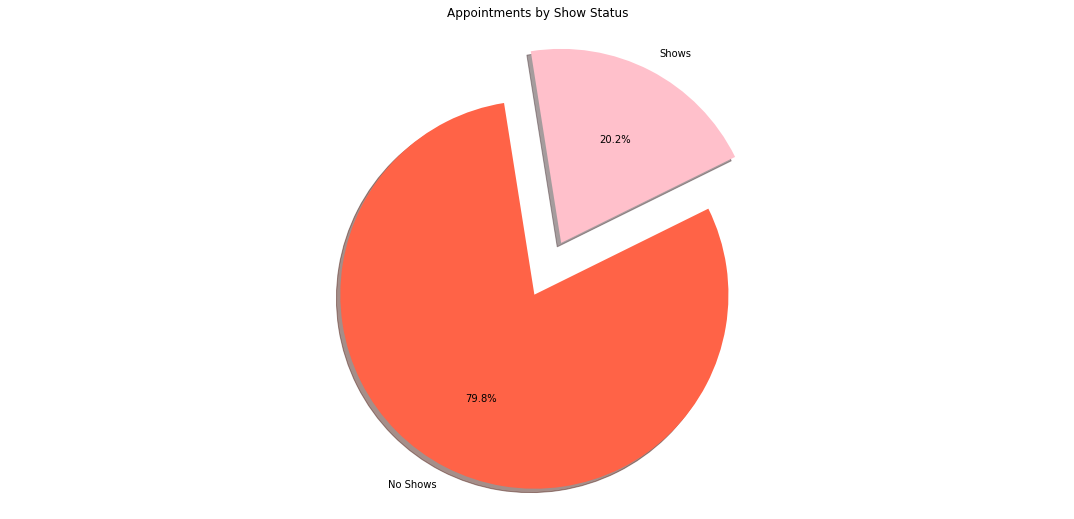

In [97]:
# Data to plot
labels = ['No Shows', 'Shows']
sizes = [nos_prop, shows_prop]
colors = ['tomato', 'pink']
explode = (0, 0.3)

# The plot
plt.pie(sizes, explode=explode, labels=labels, colors=colors,
        autopct='%1.1f%%', shadow = True, startangle = 99)
plt.title('Appointments by Show Status')
plt.axis('equal')
fig = plt.gcf()
fig.set_size_inches(19,9);

#### What is the patient age distribution of no-shows versus shows?

In [98]:
age_df_nos = no_shows['age'].mean()
age_df_nos

34.31766656212196

In [99]:
age_df_shows = shows['age'].mean()
age_df_shows

37.790064393252315

In [100]:
# Data to plot

age_df_nos = no_shows['age']
age_df_shows = shows['age']

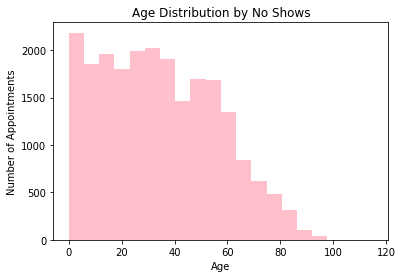

In [101]:
# The plot

plt.hist(age_df_nos, stacked=True, bins=20, color='pink')
plt.title('Age Distribution by No Shows')
plt.xlabel('Age')
plt.ylabel('Number of Appointments')
fig.set_size_inches(19,9);

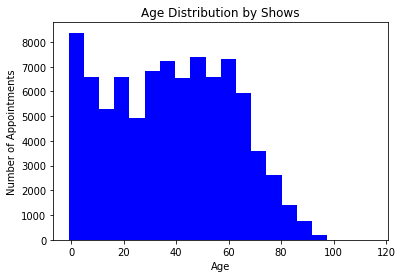

In [102]:
# The plot

plt.hist(age_df_shows, stacked=True, bins=20, color='blue')
plt.title('Age Distribution by Shows')
plt.xlabel('Age')
plt.ylabel('Number of Appointments')
fig.set_size_inches(9,9);

#### What is the patient health designation breakdown of no-shows versus shows?

In [103]:
# Total No-Shows
nos_by_health = no_shows.loc[(no_shows.alcoholism == 1) & (no_shows.handicap == 1) & (no_shows.hypertension == 1) & (no_shows.diabetes == 1)]
total_nos = nos_by_health.shape[0]

# Total Shows
shows_by_health = shows.loc[(shows.alcoholism == 1) & (shows.handicap == 1) & (shows.hypertension == 1) & (shows.diabetes == 1)]
total_shows = shows_by_health.shape[0]

# Total Alcoholism
df_alc2 = shows.query('alcoholism == "1"')
dfa2 = df_alc2.shape[0]

# Proportion Alcoholism
a2 = float(dfa2 / total_shows)

# Total Handicap
df_han2 = shows.query('handicap == "1"')
dfb2 = df_han2.shape[0]

# Proportion Handicap
b2 = float(dfb2 / total_shows)

# Total Hypertension
df_hyp2 = shows.query('hypertension == "1"')
dfc2 = df_hyp2.shape[0]

# Proportion Hypertension
c2 = float(dfc2 / total_shows)

# Total Diabetes
df_dia2 = shows.query('diabetes == "1"')
dfd2 = df_dia2.shape[0]

# Proportion Diabetes
d2 = float(dfd2 / total_shows)

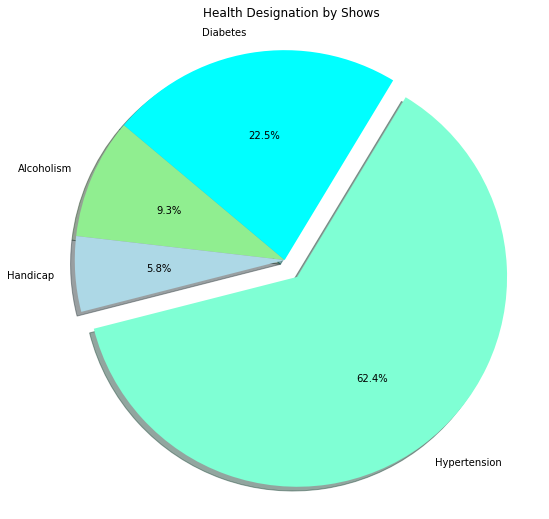

In [104]:
# The plot
labels = ['Alcoholism', 'Handicap', 'Hypertension', 'Diabetes']
sizes = [a2, b2, c2, d2]
colors = ['lightgreen', 'lightblue', 'aquamarine', 'cyan']
explode = (0, 0, 0.1, 0)

plt.pie(sizes, explode=explode, labels=labels, colors=colors,
        autopct='%1.1f%%', shadow=True, startangle=140)

plt.title('Health Designation by Shows')
plt.axis('equal')
fig = plt.gcf()
fig.set_size_inches(9,9);

In [105]:
# Total Alcoholism
df_alc = no_shows.query('alcoholism == "1"')
dfa = df_alc.shape[0]

# Proportion Alcoholism
a = float(dfa / total_nos)

# Total Handicap
df_han = no_shows.query('handicap == "1"')
dfb = df_han.shape[0]

# Proportion Handicap
b = float(dfb / total_nos)

# Total Hypertension
df_hyp = no_shows.query('hypertension == "1"')
dfc = df_hyp.shape[0]

# Proportion Hypertension
c = float(dfc / total_nos)

# Total Diabetes
df_dia = no_shows.query('diabetes == "1"')
dfd = df_dia.shape[0]

# Proportion Diabetes
d = float(dfd / total_nos)

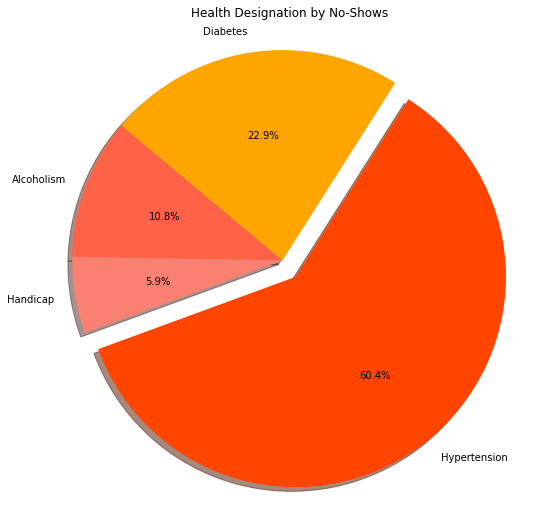

In [106]:
# The plot
labels = ['Alcoholism', 'Handicap', 'Hypertension', 'Diabetes']
sizes = [a, b, c, d]
colors = ['tomato', 'salmon', 'orangered', 'orange']
explode = (0, 0, 0.1, 0)

plt.pie(sizes, explode=explode, labels=labels, colors=colors,
        autopct='%1.1f%%', shadow=True, startangle=140)

plt.title('Health Designation by No-Shows')
plt.axis('equal')
fig = plt.gcf()
fig.set_size_inches(9,9);

#### Which neighborhoods have the highest number of no-shows?

In [107]:
shows_by_hood = shows.groupby("neighborhood")["no_show"].count().reset_index(name="count").sort_values("count", ascending=False)
shows_by_hood.head(10)

,neighborhood,count
37,JARDIM CAMBURI,6252
42,MARIA ORTIZ,4586
58,RESISTÊNCIA,3525
38,JARDIM DA PENHA,3246
65,SANTA MARTHA,2635
10,CENTRO,2631
35,ITARARÉ,2591
77,TABUAZEIRO,2559
68,SANTO ANTÔNIO,2262
8,BONFIM,2223


In [108]:
nos_by_hood = no_shows.groupby("neighborhood")["no_show"].count().reset_index(name="count").sort_values("count", ascending=False)
nos_by_hood.head(10)

,neighborhood,count
38,JARDIM CAMBURI,1465
43,MARIA ORTIZ,1219
36,ITARARÉ,923
58,RESISTÊNCIA,906
10,CENTRO,703
40,JESUS DE NAZARETH,696
39,JARDIM DA PENHA,631
9,CARATOÍRA,591
77,TABUAZEIRO,573
8,BONFIM,550


#### What is the breakdown of no-shows versus shows by patients that received SMS reminders?

In [109]:
# Data to plot

nos_sms_count = no_shows.query('sms_received == 1')
a = nos_sms_count.shape[0]

In [110]:
shows_sms_count = shows.query('sms_received == 1')
b = shows_sms_count.shape[0]

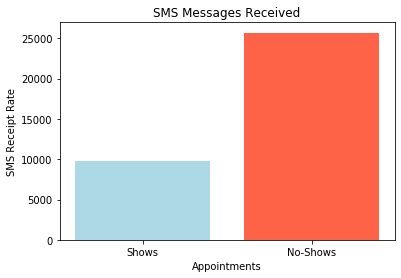

In [111]:
# The plot

locations = [1, 2]
heights = [a, b]
labels = ['Shows', 'No-Shows']

bar1 = plt.bar(locations, heights, tick_label=labels, color=['lightblue','tomato'])
plt.title('SMS Messages Received')
plt.xlabel('Appointments')
plt.ylabel('SMS Receipt Rate');
fig.set_size_inches(19,19);

In [112]:
# Data to plot

nos_sms_count = no_shows.query('sms_received == 0')
c_ct = nos_sms_count.shape[0]

shows_sms_count = shows.query('sms_received == 0')
d_ct = shows_sms_count.shape[0]

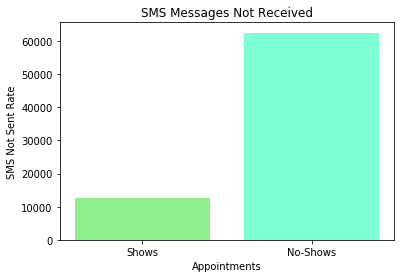

In [113]:
# The plot
locations = [1, 2]
heights = [c_ct, d_ct]
labels = ['Shows', 'No-Shows']

bar2 = plt.bar(locations, heights, tick_label=labels, color=['lightgreen','aquamarine'])
plt.title('SMS Messages Not Received')
plt.xlabel('Appointments')
plt.ylabel('SMS Not Sent Rate');
fig.set_size_inches(9,9);

#### Do no-shows have a larger timeframe between schedule date and appointment date?

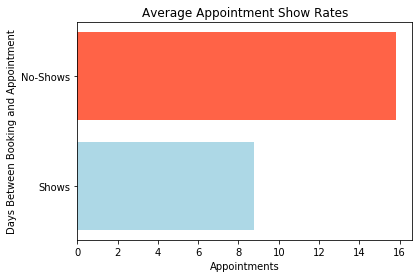

In [114]:
# The plot

locations = [1, 2]
heights = [timeframe_shows, timeframe_nos]
labels = ['Shows', 'No-Shows']

plt.barh(locations, heights, tick_label=labels, color=['lightblue','tomato'])
plt.title('Average Appointment Show Rates')
plt.xlabel('Appointments')
plt.ylabel('Days Between Booking and Appointment')
fig.set_size_inches(19,9);

#### Do appointment no-shows occur on specific days of the week?

In [115]:
# Data to plot

nos_mon = no_shows.query('appointment_dow == "Monday"')
nos_mon = nos_mon['appointment_dow'].count()

nos_tue = no_shows.query('appointment_dow == "Tuesday"')
nos_tue = nos_tue['appointment_dow'].count()

nos_wed = no_shows.query('appointment_dow == "Wednesday"')
nos_wed = nos_wed['appointment_dow'].count()

nos_thu = no_shows.query('appointment_dow == "Thursday"')
nos_thu = nos_thu['appointment_dow'].count()

nos_fri = no_shows.query('appointment_dow == "Friday"')
nos_fri = nos_fri['appointment_dow'].count()

nos_sat = no_shows.query('appointment_dow == "Saturday"')
nos_sat = nos_sat['appointment_dow'].count()

nos_sun = no_shows.query('appointment_dow == "Sunday"')
nos_sun = nos_sun['appointment_dow'].count()

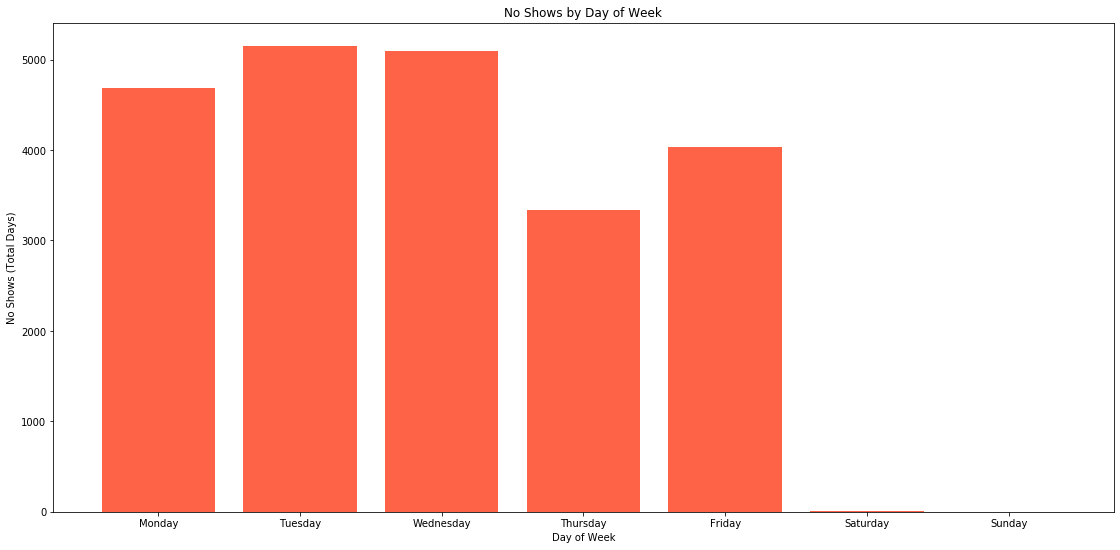

In [116]:
# The plot

locations = [1, 2, 3, 4, 5, 6, 7]
heights = [nos_mon, nos_tue, nos_wed, nos_thu, nos_fri, nos_sat, nos_sun]
labels = ['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday']
plt.bar(locations, heights, tick_label=labels, color='tomato')
plt.title('No Shows by Day of Week')
plt.xlabel('Day of Week')
plt.ylabel('No Shows (Total Days)')

fig = plt.gcf()
fig.set_size_inches(19,9);

#### Are there any trends in appointment no-shows versus shows over time?

In [117]:
# Dataframe with no_show status

line_df = df.groupby(["appointment_day","no_show"])["no_show"].count().reset_index(name="appt_count")
line_df.head()

,appointment_day,no_show,appt_count
0,2016-04-29,0,2602
1,2016-04-29,1,633
2,2016-05-02,0,3515
3,2016-05-02,1,861
4,2016-05-03,0,3425


In [118]:
# Data to plot

line_df_shows = line_df.query('no_show == "1"')
line_df_shows.groupby("appointment_day").count()
line_df_shows.head()

,appointment_day,no_show,appt_count
1,2016-04-29,1,633
3,2016-05-02,1,861
5,2016-05-03,1,831
7,2016-05-04,1,973
9,2016-05-05,1,807


In [119]:
line_df_nos = line_df.query('no_show == "0"')
line_df_nos.groupby("appointment_day").count()
line_df_nos.head()

,appointment_day,no_show,appt_count
0,2016-04-29,0,2602
2,2016-05-02,0,3515
4,2016-05-03,0,3425
6,2016-05-04,0,3195
8,2016-05-05,0,3466


In [120]:
line_shows_date = line_df_shows['appointment_day']
line_shows_count = line_df_shows['appt_count']

In [121]:
line_nos_date = line_df_nos['appointment_day']
line_nos_count = line_df_nos['appt_count']

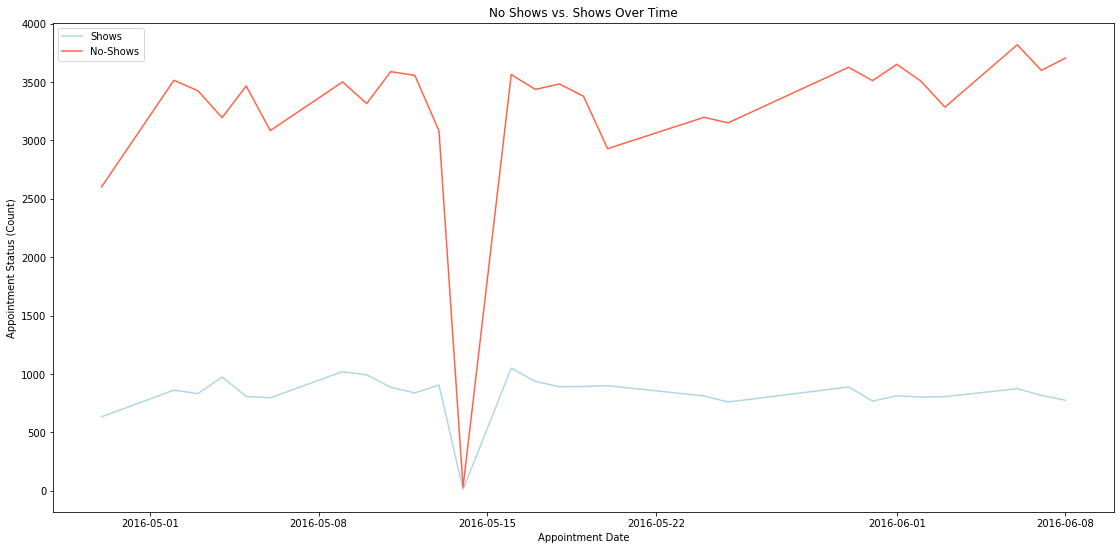

In [122]:
# The plot

line_shows, = plt.plot(line_shows_date, line_shows_count, color='lightblue', label='Shows')
line_nos, = plt.plot(line_nos_date, line_nos_count, color='tomato', label='No-Shows')

plt.title('No Shows vs. Shows Over Time')
plt.xlabel('Appointment Date')
plt.ylabel('Appointment Status (Count)')
plt.legend(handles=[line_shows, line_nos])

fig = plt.gcf()
fig.set_size_inches(19,9);

<a id='conclusions'></a>
# Conclusions

Nearly 80% of all appointments investigated were no-shows.

### Observations:

**What is the patient age distribution of no-shows versus shows?**

* Patient age was charted to see if there was a large difference between the no-shows and shows segments. The mean age of the no-shows segment was 34 compared to the shows segment which was 38. No significant differences to note.

**What is the patient health designation breakdown of no-shows versus shows?**

* Patient health desigations were charted to see if there was a large difference between the no-shows and shows segments. Hypertension was the largest category in both segments due to the popularity of the designation. No  correlations to note.

**Which neighborhoods have the highest number of no-shows?**

* Neighborhood in which the appointment took place was charted to see if certain areas saw higher no-show rates. JARDIM CAMBURI and MARIA ORTIZ were the Top 2 neighborhoods in both the no-shows and shows segments. This is likely due to the population of these neighbhorhoods. It would be worth see if there is any statistical significance in the rate of no shows across different regions.

**What is the breakdown of no-shows versus shows by patients that received SMS reminders?**

* The proportion of no-shows was nearly double when an SMS message was NOT sent to the patient before their appointment day. There is a correlation between SMS messaging and appointment show rate. It would be worth performing additional analyses to understand how strong this correlation is.

**Do no-shows have a larger timeframe between schedule date and appointment date?**

* Timeframe between schedule date and apppointment date was investigated to see if there was any correlation with show rates. The mean timeframe between schedule date and appointment date for no-shows was significantly higher than shows. The show rate was better if the appointment was booked fewer days from the appointment date. There is a correlation between the number of days out and appointment show rate; it would be worth performing additional analyses to understand how strong this correlation is.

**Do appointment no-shows occur on specific days of the week?**

* Appointment no-shows occurred the most on Tuesdays and the least on Thursdays. Overall, appointments early in the week have a higher no-show rate. It's difficult to draw any conclusions from this but could be run through a regression analysis to better understand which other show rate influencer day of week correlates with.

**Are there trends in appointment no-shows versus shows over time?**

* Appointment no-shows are increasing at a higher rate than appointment shows. Performing a regression analysis could provide insight into which factors are impacting appointment show rates the most.

In [123]:
from subprocess import call
call(['python', '-m', 'nbconvert', 'Investigate_a_Dataset.ipynb'])

4294967295